# [Final] 백신 접종과 확진자 발생 분석

---

## 프로젝트 목표

- **백신 접종**이 **확진자 수**에 영향을 미치는지 heatmap을 분석하기
- 지역구별 확진자 수를 분석하기
- **확진자 수**를 **RNN**을 통해서 예측하기

---

## 프로젝트 목차
### EDA
1. **데이터 읽기:** 코로나 관련 데이터를 불러오고 DataFrame 구조, columns 등을 확인<br>
    1.1. 데이터 불러오기<br>
    1.2. 데이터 확인하기<br>
<br>
2. **데이터 정제:** 데이터 확인 후 형 변환 및 이상치 데이터 처리<br>
    2.1. 확진자, 지역구별 데이터에서 불필요한 열 삭제<br>
    2.2. 확진자, 지역구별 데이터를 백신 데이터의 날짜와 통일<br>
<br>
3. **데이터 시각화:** 각 변수별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 총해 데이터 특성 파악<br>
    3.1. 서울시 전체 확진자 그래프<br>
    3.2. 지역구별 전체 확진자 그래프<br>
    3.3. heat map 확인<br>
<br>
<br>

### Prediction
1. [RNN] 확진자 데이터만 이용해서 예측하기
2. [RNN] 기타 데이터를 함께 이용해서 예측하기

---

## 데이터 출처
- 데이터 다운로드 날짜: 2021.12.15
- 서울시 확진자 현황: http://data.seoul.go.kr/dataList/OA-20461/S/1/datasetView.do  
- 서울시 백신 예방 접종 현황: http://data.seoul.go.kr/dataList/OA-20914/S/1/datasetView.do  
- 서울시 자치구별 확진자 현황: http://data.seoul.go.kr/dataList/OA-20470/S/1/datasetView.do

---

## 프로젝트 개요

포스트 코로나 시대를 위해 국가차원에서 백신 접종을 장려하고 있습니다. 
하지만 백신의 부작용이 사회적 문제로 떠오르고 있는 상황속에서 백신이 실제로 코로나 바이러스 예방에 효과가 있는지를 객관적으로 알아보고 확진자 수를 예측해봅시다.  

이번 프로젝트에서는 서울 열린 데이터 광장에서 제공하는 `서울시 확진자 현황`, `서울시 자치구별 확진자 현황` 데이터를 분석하고 `서울시 백신 예방 접종 현황` 데이터를 활용해 백신의 실효를 확인해 봅시다.

---

---  
    
## 1. 데이터 읽기
<br>
<br>
  
한글 깨짐 현상 방지를 위해 csv 파일을 **파일-다른 이름으로 저장 - CSV UTF-8 (쉼표로 분리) 로 변경**하여 저장

### 1.1. 데이터 불러오기

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# pd.read_csv를 통하여 csv 형식의 데이터를 DataFrame 형식으로 읽어옵니다.
vaccine = pd.read_csv("서울특별시 코로나19 백신 예방접종 현황.csv")
confirmed = pd.read_csv("서울특별시 코로나19 확진자 발생동향.csv")
confirmed_area = pd.read_csv("서울특별시 코로나19 자치구별 확진자 발생동향.csv")

### 1.2. 데이터 확인하기

In [3]:
# 백신 정보의 날짜를 확인합니다.
print(max(vaccine["접종일"]))
print(min(vaccine["접종일"]))
vaccine = vaccine.rename(columns={"접종일":"date_time"})
# 백신 정보의 상위 5개 데이터를 출력합니다.
vaccine.head()

2021.12.15
2021.04.21


,date_time,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
0,2021.12.15,9505868,11851,8034078,84.5,7820,7815332,82.2,170057.0,1663071.0,17.5
1,2021.12.14,9505868,8483,8008859,84.3,6705,7795782,82.0,139233.0,1344229.0,14.1
2,2021.12.13,9505868,11156,8008859,84.3,10094,7795782,82.0,143908.0,1344229.0,14.1
3,2021.12.12,9505868,304,7994449,84.1,284,7782371,81.9,1826.0,1199359.0,12.6
4,2021.12.11,9505868,4597,7994240,84.1,6048,7782165,81.9,59658.0,1197488.0,12.6


In [4]:
confirmed = confirmed.rename(columns={"서울시 기준일":"date_time"})

# 서울시 확진자 정보의 날짜를 확인합니다.
print(max(confirmed["date_time"]))
print(min(confirmed["date_time"]))
confirmed

2021.12.16.00
20.02.05.15


,date_time,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),...,전국 퇴원,전국 사망,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자
0,2021.12.16.00,193389,3057,43353,148598,456,1438,NaN,NaN,NaN,...,444970,4518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2021.12.15.00,190332,3166,40772,148142,1879,1418,NaN,NaN,NaN,...,442293,4456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2021.12.14.00,187169,2062,39511,146263,624,1395,NaN,NaN,NaN,...,435541,4387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2021.12.13.00,185108,2550,38113,145639,692,1356,NaN,NaN,NaN,...,433564,4293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2021.12.12.00,182558,2528,36271,144947,998,1340,NaN,NaN,NaN,...,431606,4253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,20.02.09.18,10,0,10,0,0,0,459.0,45.0,414.0,...,3,0,2571.0,888.0,1683.0,0.0,0.0,0.0,0.0,NaN
678,20.02.08.18,10,0,10,0,0,0,414.0,92.0,322.0,...,2,0,1677.0,620.0,1057.0,0.0,0.0,0.0,0.0,NaN
679,20.02.07.18,10,0,10,0,0,0,322.0,115.0,207.0,...,2,0,1106.0,264.0,842.0,0.0,0.0,0.0,0.0,NaN
680,20.02.06.09,11,0,11,0,0,0,192.0,28.0,164.0,...,1,0,591.0,169.0,693.0,0.0,0.0,0.0,0.0,0.0


In [5]:
confirmed_area = confirmed_area.rename(columns={"자치구 기준일":"date_time"})

# 서울시 자치구별 확진자 정보의 날짜를 확인합니다.
print(max(confirmed_area["date_time"]))
print(min(confirmed_area["date_time"]))
confirmed_area

2021.12.16.00
20.02.05.10


,date_time,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2021.12.16.00,3390,41,3243,44,4620,70,4925,69,6092,...,7154,110,10881,162,11663,123,7900,135,14382,326
1,2021.12.15.00,3349,39,3199,49,4550,61,4856,73,6011,...,7044,115,10719,127,11540,252,7765,138,14056,132
2,2021.12.14.00,3310,26,3150,25,4489,38,4783,59,5939,...,6929,82,10591,91,11288,115,7627,68,13926,287
3,2021.12.13.00,3298,66,3140,28,4451,52,4719,54,5889,...,6847,97,10506,150,11109,175,7555,76,13766,180
4,2021.12.12.00,3232,43,3111,43,4399,50,4665,44,5826,...,6750,106,10356,106,10934,116,7479,109,13592,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,20.02.09.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
678,20.02.08.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,20.02.07.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
680,20.02.06.10,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,1


자치구별 데이터에서 `자치구 기준일`컬럼을 확인해보면 20이라는 이상치가 존재함을 알 수 있다.
이를 삭제해야 한다.

In [6]:
confirmed_area1 = confirmed_area[confirmed_area["date_time"]!="20"]

# 서울시 자치구별 확진자 정보의 날짜를 확인합니다.
print(max(confirmed_area1["date_time"]))
print(min(confirmed_area1["date_time"]))
confirmed_area1

2021.12.16.00
20.02.05.10


,date_time,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2021.12.16.00,3390,41,3243,44,4620,70,4925,69,6092,...,7154,110,10881,162,11663,123,7900,135,14382,326
1,2021.12.15.00,3349,39,3199,49,4550,61,4856,73,6011,...,7044,115,10719,127,11540,252,7765,138,14056,132
2,2021.12.14.00,3310,26,3150,25,4489,38,4783,59,5939,...,6929,82,10591,91,11288,115,7627,68,13926,287
3,2021.12.13.00,3298,66,3140,28,4451,52,4719,54,5889,...,6847,97,10506,150,11109,175,7555,76,13766,180
4,2021.12.12.00,3232,43,3111,43,4399,50,4665,44,5826,...,6750,106,10356,106,10934,116,7479,109,13592,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,20.02.09.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
678,20.02.08.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,20.02.07.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
680,20.02.06.10,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,1


---

## 2. 데이터 정제

데이터를 확인해보니  
백신 데이터는 2021년 4.21 ~ 12.15   
서울시 전체 확진자 데이터는 2020년 2.5 ~ 2021년 12.16   
서울시 자치구별 확진자 데이터는 2020년 2.28 ~ 2021년 12.16까지 수집된 데이터인 것을 알 수 있습니다.  

### 2.1. 확진자, 지역구별 데이터에서 불필요한 열 삭제

수집한 데이터 중 불필요한 컬럼은 제거합니다.

In [7]:
#print("confirmed columns :\n", confirmed.columns.values)
confirmed1 = confirmed.iloc[:,[0,1,2,6,11,12,15]]
print("confirmed1 columns :\n", confirmed1.columns.values)


#print("\n\nconfirmed_area columns :\n", confirmed_area.columns.values)
confirmed_area1 = confirmed_area.iloc[:,:53]
print("\n\nconfirmed_area1 columns :\n", confirmed_area1.columns.values)

confirmed1 columns :
 ['date_time' '서울시 확진자' '서울시 추가 확진' '서울시 사망' '전국 확진' '전국 추가 확진' '전국 사망']


confirmed_area1 columns :
 ['date_time' '종로구 전체' '종로구 추가' '중구 전체' '중구 추가' '용산구 전체' '용산구 추가' '성동구 전체'
 '성동구 추가' '광진구 전체' '광진구 추가' '동대문구 전체' '동대문구 추가' '중랑구 전체' '중랑구 추가' '성북구 전체'
 '성북구 추가' '강북구 전체' '강북구 추가' '도봉구 전체' '도봉구 추가' '노원구 전체' '노원구 추가' '은평구 전체'
 '은평구 추가' '서대문구 전체' '서대문구 추가' '마포구 전체' '마포구 추가' '양천구 전체' '양천구 추가' '강서구 전체'
 '강서구 추가' '구로구 전체' '구로구 추가' '금천구 전체' '금천구 추가' '영등포구 전체' '영등포구 추가' '동작구 전체'
 '동작구 추가' '관악구 전체' '관악구 추가' '서초구 전체' '서추구 추가' '강남구 전체' '강남구 추가' '송파구 전체'
 '송파구 추가' '강동구 전체' '강동구 추가' '기타 전체' '기타 추가']


In [8]:
def check_missing_col(data):
    counted_missing_col = 0
    for i, col in enumerate(data.columns):
        missing_values = sum(data[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(data.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(vaccine)
vaccine = vaccine.fillna(0)
print(vaccine)
check_missing_col(vaccine)

print()
check_missing_col(confirmed1)
confirmed1 = confirmed1.fillna(0)
check_missing_col(confirmed1)

print()
check_missing_col(confirmed_area1)
confirmed_area1 = confirmed_area1.fillna(0)
check_missing_col(confirmed_area1)

결측치가 있는 컬럼은: 당일 추가접종자 수입니다
총 169개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 추가접종 누계입니다
총 175개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 추가접종률(%)입니다
총 191개의 결측치가 존재합니다.
      date_time    접종대상자  당일 1차접종자 수  1차접종 누계  1차접종률(%)  당일 2차접종자 수  2차접종 누계  \
0    2021.12.15  9505868       11851  8034078      84.5        7820  7815332   
1    2021.12.14  9505868        8483  8008859      84.3        6705  7795782   
2    2021.12.13  9505868       11156  8008859      84.3       10094  7795782   
3    2021.12.12  9505868         304  7994449      84.1         284  7782371   
4    2021.12.11  9505868        4597  7994240      84.1        6048  7782165   
..          ...      ...         ...      ...       ...         ...      ...   
234  2021.04.25  1023346       23323   350631      34.2        3411    18513   
235  2021.04.24  1023346         200   350427      34.2           0    18513   
236  2021.04.23  1027740       10195   345764      33.6         119    18376   
237  2021.04.22  1023538       27074   317386      31.0        2

### 2.2. 확진자, 지역구별 데이터를 백신 데이터의 날짜와 통일

이번 프로젝트에서는 **백신 접종의 유무**가 중요 포인트 이므로 백신 데이터의 날짜를 기준으로 다른 데이터들의 날짜를 맞춰줍니다.

수집한 데이터들의 날짜를 통일합니다.

In [9]:
import datetime
pd.set_option('mode.chained_assignment',  None)
index1 = confirmed1[(confirmed1["date_time"] <= "2021.04.21") | 
                    (confirmed1["date_time"] >= "2021.12.16")].index
confirmed_v = confirmed1.drop(index1)

for i in range(1, len(confirmed_v["date_time"].values)+1):
    dt_datetime = confirmed_v["date_time"][i][0:-3]
    confirmed_v["date_time"][i] = dt_datetime

confirmed_v = confirmed_v.sort_values(by="date_time", ascending=True)
confirmed_v = confirmed_v.reset_index()
confirmed_v = confirmed_v.drop(columns="index")
confirmed_v

,date_time,서울시 확진자,서울시 추가 확진,서울시 사망,전국 확진,전국 추가 확진,전국 사망
0,2021.04.21,35994,218,443,115926,731,1806
1,2021.04.22,36224,230,443,116661,735,1808
2,2021.04.23,36428,204,444,117458,797,1811
3,2021.04.24,36681,253,444,118243,785,1812
4,2021.04.25,36856,175,444,118887,644,1813
...,...,...,...,...,...,...,...
235,2021.12.11,180031,2835,1328,510583,6977,4210
236,2021.12.12,182558,2528,1340,512976,6689,4253
237,2021.12.13,185108,2550,1356,523088,5817,4293
238,2021.12.14,187169,2062,1395,528652,5567,4387


In [10]:
confirmed_v1 = confirmed_v.iloc[:,[0,1,4]] # 전체 확진자만 모은 데이터프레임
confirmed_v2 = confirmed_v.iloc[:,[0,2,3,5,6]] # 추가 확진자, 사망자만 모은 데이터프레임

In [11]:
import datetime
pd.set_option('mode.chained_assignment',  None)
index2 = confirmed_area1[(confirmed_area1["date_time"] <= "2021.04.21") | 
                    (confirmed_area1["date_time"] >= "2021.12.16")].index
confirmed_area_v = confirmed_area1.drop(index2)

for i in range(1, len(confirmed_area_v["date_time"].values)+1):
    dt_datetime = confirmed_area_v["date_time"][i][0:-3]
    confirmed_area_v["date_time"][i] = dt_datetime

confirmed_area_v = confirmed_area_v.sort_values(by="date_time", ascending=True)
confirmed_area_v = confirmed_area_v.reset_index()
confirmed_area_v = confirmed_area_v.drop(columns="index")
confirmed_area_v


,date_time,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2021.04.21,658,4,565,8,955,4,963,8,1142,...,1503,10,1779,11,2023,20,1323,9,3763,7
1,2021.04.22,661,4,568,3,957,2,971,8,1150,...,1514,11,1797,18,2039,14,1329,6,3775,13
2,2021.04.23,665,4,569,1,960,3,984,12,1164,...,1523,9,1811,14,2050,11,1341,12,3788,10
3,2021.04.24,666,2,576,7,964,4,993,9,1182,...,1541,18,1832,21,2063,14,1362,20,3806,16
4,2021.04.25,668,2,579,3,968,4,1001,8,1188,...,1549,8,1843,11,2073,10,1371,9,3815,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.12.11,3189,35,3068,42,4349,50,4621,59,5761,...,6645,101,10250,124,10818,202,7370,130,13320,376
236,2021.12.12,3232,43,3111,43,4399,50,4665,44,5826,...,6750,106,10356,106,10934,116,7479,109,13592,273
237,2021.12.13,3298,66,3140,28,4451,52,4719,54,5889,...,6847,97,10506,150,11109,175,7555,76,13766,180
238,2021.12.14,3310,26,3150,25,4489,38,4783,59,5939,...,6929,82,10591,91,11288,115,7627,68,13926,287


In [12]:
# confirmed_area_v1 = confirmed_area_v.iloc[:,[0,1,4]]
# confirmed_area_v2 = confirmed_area_v.iloc[:,[0,2,3,5,6]]
tmp = [0]
tmp2 = [0]
for i in range(1,len(confirmed_area_v.columns.values)):
    if(i%2!=0):
        tmp.append(i)
    else:
        tmp2.append(i)
confirmed_area_v1 = confirmed_area_v.iloc[:,tmp] # 전체 확진자만 모은 데이터프레임
confirmed_area_v2 = confirmed_area_v.iloc[:,tmp2] # 추가 확진자만 모은 데이터프레임


---

## 3. 데이터 시각화

전체 기간동안의 확진자, 사망자 변화 추이를 그래츠로 살펴보자.

In [13]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [14]:
from plotly import tools, subplots 
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.express as px 
import plotly.figure_factory as ff 
import plotly.io as pio 
pio.templates.default = "plotly_white" 
import matplotlib.pyplot as plt 
import seaborn as sns

### 3.1. 확진자 사망자 추이

In [15]:
fig = px.line(confirmed.sort_values(by="date_time", ascending=True),
              x="date_time", y="서울시 추가 확진", title = "서울시 전체 기간 확진자 추이")
fig.show()

 - 2020년 11월 ~ 12월에 확진자 수가 급격하게 증가했다가 시간이 지나며 확진자 수가 줄었지만 2021년 7월 즈음부터 다시 급격한 상승세를 보인다. 2021년 9월을 기점으로 코로나가 한풀 꺾이는듯 했지만 11월부터 폭발적으로 증가하여 다시 최고치를 갱신했다.

In [16]:
fig = px.line(confirmed.sort_values(by="date_time", ascending=True), 
              x="date_time", y="서울시 사망", title = "서울시 전체 기간 사망자 추이") 
fig.show()

- 서울시 사망자도 확진자와 마찬가지로 지속적인 상승세를 보인다.
- 2021년 2월부터 8월까지가 비교적 원만한 기울기를 보인다.
- 2021년 10월을 기점으로 어마어마한 성장세가 나타난다.

In [17]:
fig = px.line(confirmed_v, x="date_time", y="서울시 추가 확진", title = "서울시 백신 기간 확진자 추이")
fig.show()

In [18]:
fig = px.line(confirmed_v, x="date_time", y="서울시 사망", title = "서울시 백신 기간 사망자 추이")
fig.show()

- 서울시 확진자도 지속적인 상승세를 보인다. 

대한민국은 2021년 2월 26일부터 고령자들을 시작으로 백신 접종이 이루어지고 있지만 2차 접종 완료 인원이 점점 증가하는 요즘에도 확진자와 사망자가 지속적으로 늘고 있다.

In [19]:
vaccine2 = vaccine.drop(columns=["접종대상자"])
df = pd.merge(confirmed_v2, vaccine2, how='inner', on="date_time")
df_o = pd.merge(confirmed_v1, vaccine2, how='inner', on="date_time")

df = pd.merge(confirmed_v, vaccine2, how='inner', on="date_time")


### 3.2. 특정 자역의 확진자 추이

- 강남구

In [20]:
confirmed_area_v

,date_time,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2021.04.21,658,4,565,8,955,4,963,8,1142,...,1503,10,1779,11,2023,20,1323,9,3763,7
1,2021.04.22,661,4,568,3,957,2,971,8,1150,...,1514,11,1797,18,2039,14,1329,6,3775,13
2,2021.04.23,665,4,569,1,960,3,984,12,1164,...,1523,9,1811,14,2050,11,1341,12,3788,10
3,2021.04.24,666,2,576,7,964,4,993,9,1182,...,1541,18,1832,21,2063,14,1362,20,3806,16
4,2021.04.25,668,2,579,3,968,4,1001,8,1188,...,1549,8,1843,11,2073,10,1371,9,3815,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.12.11,3189,35,3068,42,4349,50,4621,59,5761,...,6645,101,10250,124,10818,202,7370,130,13320,376
236,2021.12.12,3232,43,3111,43,4399,50,4665,44,5826,...,6750,106,10356,106,10934,116,7479,109,13592,273
237,2021.12.13,3298,66,3140,28,4451,52,4719,54,5889,...,6847,97,10506,150,11109,175,7555,76,13766,180
238,2021.12.14,3310,26,3150,25,4489,38,4783,59,5939,...,6929,82,10591,91,11288,115,7627,68,13926,287


In [21]:
fig = px.line(confirmed_area_v, x="date_time", y="강남구 전체", title = "강남구 백신 기간 전체 확진자 추이")
fig.show()

In [22]:
fig = px.line(confirmed_area_v, x="date_time", y="강남구 추가", title = "강남구 백신 기간 추가 확진자 추이")
fig.show()

대한민국은 2021년 2월 26일부터 고령자들을 시작으로 백신 접종이 이루어지고 있지만 2차 접종 완료 인원이 점점 증가하는 요즘에도 확진자와 사망자가 지속적으로 늘고 있다.

In [23]:
vaccine2 = vaccine.drop(columns=["접종대상자"])
df = pd.merge(confirmed_v, vaccine2, how='inner', on="date_time")
df_o = pd.merge(confirmed_v1, vaccine2, how='inner', on="date_time")

df

,date_time,서울시 확진자,서울시 추가 확진,서울시 사망,전국 확진,전국 추가 확진,전국 사망,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
0,2021.04.21,35994,218,443,115926,731,1806,22501,291857,28.6,2358,13543,1.3,0.0,0.0,0.0
1,2021.04.22,36224,230,443,116661,735,1808,27074,317386,31.0,2479,15901,1.6,0.0,0.0,0.0
2,2021.04.23,36428,204,444,117458,797,1811,10195,345764,33.6,119,18376,1.8,0.0,0.0,0.0
3,2021.04.24,36681,253,444,118243,785,1812,200,350427,34.2,0,18513,1.8,0.0,0.0,0.0
4,2021.04.25,36856,175,444,118887,644,1813,23323,350631,34.2,3411,18513,1.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.12.11,180031,2835,1328,510583,6977,4210,4597,7994240,84.1,6048,7782165,81.9,59658.0,1197488.0,12.6
236,2021.12.12,182558,2528,1340,512976,6689,4253,304,7994449,84.1,284,7782371,81.9,1826.0,1199359.0,12.6
237,2021.12.13,185108,2550,1356,523088,5817,4293,11156,8008859,84.3,10094,7795782,82.0,143908.0,1344229.0,14.1
238,2021.12.14,187169,2062,1395,528652,5567,4387,8483,8008859,84.3,6705,7795782,82.0,139233.0,1344229.0,14.1


### 3.3. heat map 확인

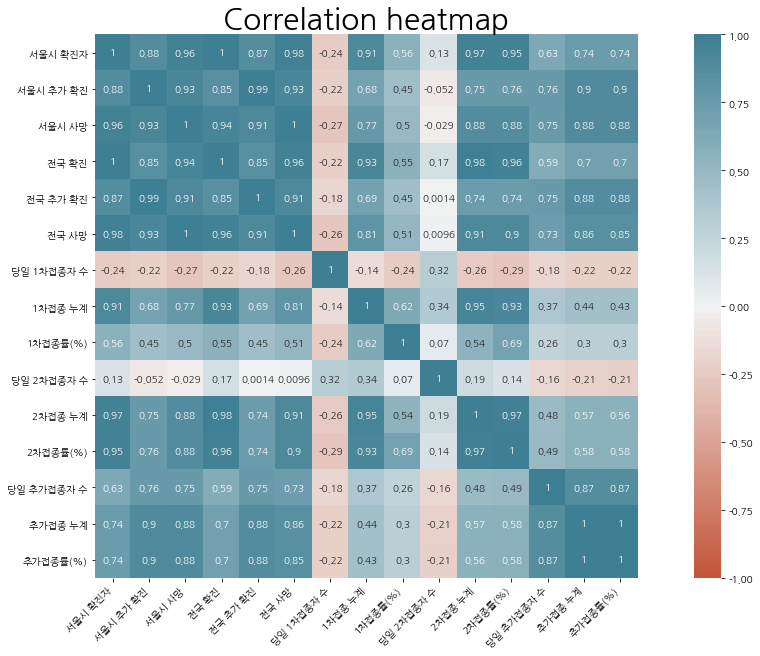

In [24]:
def draw_heatmap(data):
    number = data.select_dtypes(np.number)
    corr = number.corr()
    plt.figure(figsize=(20, 10))
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

    plt.title('Correlation heatmap', fontsize=30)
    plt.show()

draw_heatmap(df)

---

## Feature Engineering

### #MAE(Mean Absolute Error)란  :　∑( |예측값 – 실제값| ) / n
<br>
예측값과 실제값의 모든 차이의 합  
<br>
직관적으로 알 수 있음  
<br>
이상치에 덜 민감 robust  
<br>
절댓값 취해서 overperformance/underperformance 인지 확인 불가  
<br>
<br>

* overperformance : 모델이 실제보다 높은 값으로 예측  

* underperformance ; 모델이 실제보다 낮은 값으로 예측  

In [25]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score
def nmae_predict(X,Y):
    from sklearn.linear_model import LinearRegression
       
    model = LinearRegression() # 모델 정의
    model.fit(X, Y) # 학습
    print("{}을 예측했을 경우 {}의 nmae".format(Y.name,model))
    Y_hat = model.predict(X) # y 예측

    score = NMAE(Y, Y_hat)
    print(f'모델 NMAE: {round(score,5)}')         
    print()

---

### 1.0 Feature 추가하기 전

In [26]:
x  = df.drop(['date_time', '서울시 추가 확진', '서울시 사망', '전국 추가 확진', '전국 사망'], axis=1)
y1 = df["서울시 추가 확진"]
y2 = df["서울시 사망"]

nmae_predict(x,y1)
nmae_predict(x,y2)

서울시 추가 확진을 예측했을 경우 LinearRegression()의 nmae
모델 NMAE: 0.21238

서울시 사망을 예측했을 경우 LinearRegression()의 nmae
모델 NMAE: 0.01643



---

### 1.1 사회적 거리두기 단계 표시

가설 1. 사회적 거리두기 단계가 확진자,사망자 발생량에 영향을 미칠 것이다.

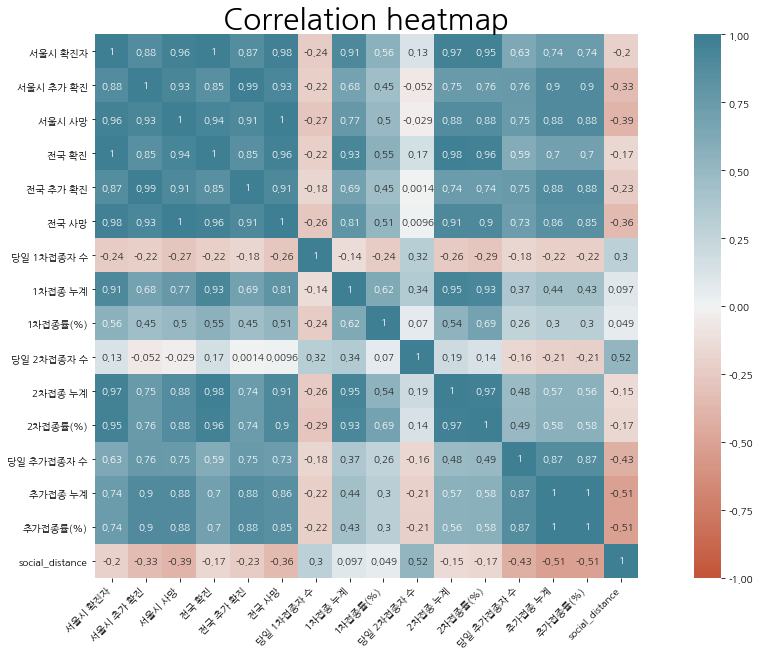

In [27]:
def create_social_distance(data):
    data["social_distance"] = 0
    data[data["date_time"] <= "2021.05.21"]

    for i in range(len(data["date_time"])): 
        if(data["date_time"][i] <= "2021.07.11"):
            data["social_distance"][i] = 2
        elif(data["date_time"][i] <= "2021.10.31"):
            data["social_distance"][i] = 4
        elif(data["date_time"][i] <= "2021.11.25"):
            data["social_distance"][i] = 1
        else:
            data["social_distance"][i] = 1    
    return data
df2 = df.copy()
confirmed_social = create_social_distance(df2)
draw_heatmap(confirmed_social)

사회적 거리두기 feature는 확진 feature에 약간의 영향을 미치지만, 사망 수치에는 거의 영향을 미치지 않는다.  
하지만, 접종률에는 유의미한 상관계수를 나타내는 것으로 보아 **불안감 조성**, **사회적 분위기** 등 [외부적, 심리적] 요인으로 인해 영향력을 행사한다고 판단된다.

In [28]:
x  = confirmed_social.drop(['date_time', '서울시 추가 확진', '서울시 사망', '전국 추가 확진', '전국 사망'], axis=1)
y1 = confirmed_social["서울시 추가 확진"]
y2 = confirmed_social["서울시 사망"]

nmae_predict(x,y1)
nmae_predict(x,y2)

서울시 추가 확진을 예측했을 경우 LinearRegression()의 nmae
모델 NMAE: 0.22218

서울시 사망을 예측했을 경우 LinearRegression()의 nmae
모델 NMAE: 0.01373



사회적 거리두기 feature를 이용했을때 확진을 예측하는 MAE는 증가했지만, 사망을 예측하는 MAE값은 감소했음을 알 수 있습니다.

---

### 1.2 공휴일, 주말 표시하기

가설 2. 공휴일이 확진자,사망자 발생량에 영향을 미칠 것이다.
- 주말 or 공휴일인 경우 : 1
- 평일인 경우 : 0

만약 holidays 패키지가 없다면 설치  
!pip install holidays

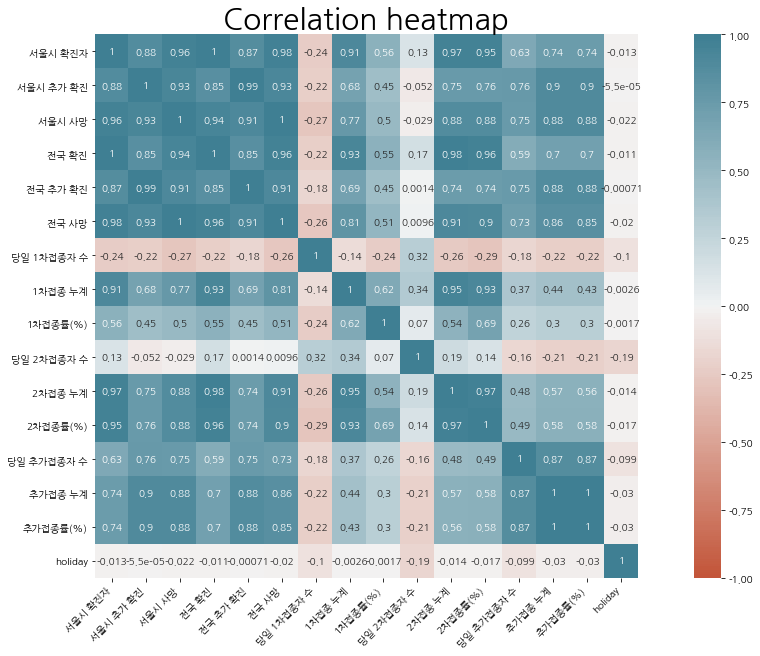

In [29]:
def create_holiday(data):
    import holidays
    from datetime import date
    import datetime
    data["holiday"] = 0
    for i in range(len(data["date_time"])): 
        if(data["date_time"][i] in holidays.KR()):
            data["holiday"][i] = 1
        
        format = '%Y.%m.%d'
        dt_datetime = datetime.datetime.strptime(data["date_time"][i],format)
        if(dt_datetime.weekday()>4):
            data["holiday"][i] = 1
    return data
df2 = df.copy()
confirmed_holiday = create_holiday(df2)
draw_heatmap(confirmed_holiday)

holiday feature는 확진자의 발생과 사망 뿐 아니라 거의 모든 feature에 영향을 미치지 않는다.  
즉, 공휴일 정보는 확진자를 예측함에 있어 무의미한 데이터이다.  

In [30]:
x  = confirmed_holiday.drop(['date_time', '서울시 추가 확진', '서울시 사망', '전국 추가 확진', '전국 사망'], axis=1)
y1 = confirmed_holiday["서울시 추가 확진"]
y2 = confirmed_holiday["서울시 사망"]

nmae_predict(x,y1)
nmae_predict(x,y2)

서울시 추가 확진을 예측했을 경우 LinearRegression()의 nmae
모델 NMAE: 0.21107

서울시 사망을 예측했을 경우 LinearRegression()의 nmae
모델 NMAE: 0.01643



공휴일 데이터를 추가했을때와 아닐때의 유의미한 차이가 heatmap으로 분석했을 경우에도 보이지 않았고 MAE값을 분석했을때도 큰 차이를 보이지 않았다.

**공휴일 데이터는 사용하지 않는다.**

---

### 1.3 달 표시하기

가설 3. 몇 월인지가 확진자 발생량에 영향을 미칠 것이다.

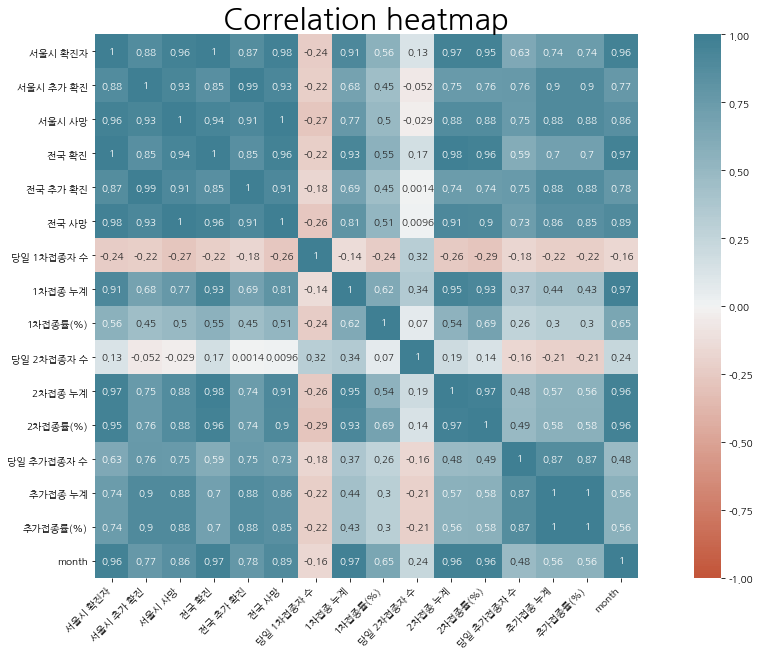

In [31]:
def seperate_datetime(data):
    year = []
    month = []
    day = []

    for date in data.date_time:
        year_point, month_point, day_point = date.split('.') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(df)
confirmed_month = df.copy()
confirmed_month["month"] = month

draw_heatmap(confirmed_month)

month feature는 확진자, 사망자 feature 뿐 아니라 접종량에도 유의미한 영향력을 행사한다.

In [32]:
x  = confirmed_month.drop(['date_time', '서울시 추가 확진', '서울시 사망', '전국 추가 확진', '전국 사망'], axis=1)
y1 = confirmed_month["서울시 추가 확진"]
y2 = confirmed_month["서울시 사망"]

nmae_predict(x,y1)
nmae_predict(x,y2)

서울시 추가 확진을 예측했을 경우 LinearRegression()의 nmae
모델 NMAE: 0.21095

서울시 사망을 예측했을 경우 LinearRegression()의 nmae
모델 NMAE: 0.01583



NMAE값을 출력한 결과 몇 월 인지에 대한 정보가 확진자를 예측하는데 도움을 준다.

In [33]:
tmp = create_social_distance(df)

year, month, day = seperate_datetime(df)
merge_df = tmp.copy()
merge_df["month"] = month
merge_df

,date_time,서울시 확진자,서울시 추가 확진,서울시 사망,전국 확진,전국 추가 확진,전국 사망,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%),social_distance,month
0,2021.04.21,35994,218,443,115926,731,1806,22501,291857,28.6,2358,13543,1.3,0.0,0.0,0.0,2,4
1,2021.04.22,36224,230,443,116661,735,1808,27074,317386,31.0,2479,15901,1.6,0.0,0.0,0.0,2,4
2,2021.04.23,36428,204,444,117458,797,1811,10195,345764,33.6,119,18376,1.8,0.0,0.0,0.0,2,4
3,2021.04.24,36681,253,444,118243,785,1812,200,350427,34.2,0,18513,1.8,0.0,0.0,0.0,2,4
4,2021.04.25,36856,175,444,118887,644,1813,23323,350631,34.2,3411,18513,1.8,0.0,0.0,0.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021.12.11,180031,2835,1328,510583,6977,4210,4597,7994240,84.1,6048,7782165,81.9,59658.0,1197488.0,12.6,1,12
236,2021.12.12,182558,2528,1340,512976,6689,4253,304,7994449,84.1,284,7782371,81.9,1826.0,1199359.0,12.6,1,12
237,2021.12.13,185108,2550,1356,523088,5817,4293,11156,8008859,84.3,10094,7795782,82.0,143908.0,1344229.0,14.1,1,12
238,2021.12.14,187169,2062,1395,528652,5567,4387,8483,8008859,84.3,6705,7795782,82.0,139233.0,1344229.0,14.1,1,12


---

## Prediction

In [34]:
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
import numpy as np


---

### 1. [RNN] 확진자 데이터만 이용해서 예측하기

In [35]:
data_li = []
for i in merge_df["서울시 확진자"]:
    a =[]
    a.append(i)
    data_li.append(a)
print(data_li)
scaler = MinMaxScaler(feature_range=(0, 1))
Data = scaler.fit_transform(data_li)
train_data, test_data = train_test_split(Data, test_size=0.2, shuffle=False)

[[35994], [36224], [36428], [36681], [36856], [37010], [37126], [37385], [37610], [37837], [38032], [38214], [38341], [38525], [38763], [38975], [39154], [39396], [39591], [39732], [39895], [40118], [40118], [40345], [40576], [40830], [41043], [41238], [41410], [41659], [41901], [42073], [42281], [42462], [42601], [42739], [43001], [43219], [43433], [43627], [43787], [43917], [44064], [44322], [44537], [44743], [45020], [45199], [45358], [45497], [45679], [45892], [46096], [46302], [46478], [46600], [46732], [46932], [47133], [47333], [47530], [47695], [47829], [47961], [48196], [48448], [48717], [48980], [49222], [49407], [49612], [49987], [50321], [50668], [51026], [51314], [51621], [51941], [52524], [53074], [53577], [54086], [54595], [54998], [55415], [56053], [56573], [57142], [57704], [58227], [58646], [59040], [59644], [60143], [60663], [61128], [61616], [61957], [62308], [62881], [63396], [63883], [64359], [64832], [65193], [65503], [65989], [66455], [66919], [67422], [67872], 

In [36]:
def create_dataset(dataset, look_back):
    x_data = []
    y_data = []
    for i in range(len(dataset)-look_back-1):
        data = dataset[i:(i+look_back), 0]
        print(data)
        x_data.append(data)
        y_data.append(dataset[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)

[0.         0.00149024 0.00281201]
[0.00149024 0.00281201 0.00445127]
[0.00281201 0.00445127 0.00558514]
[0.00445127 0.00558514 0.00658295]
[0.00558514 0.00658295 0.00733455]
[0.00658295 0.00733455 0.00901269]
[0.00733455 0.00901269 0.01047053]
[0.00901269 0.01047053 0.01194132]
[0.01047053 0.01194132 0.01320478]
[0.01194132 0.01320478 0.01438401]
[0.01320478 0.01438401 0.01520688]
[0.01438401 0.01520688 0.01639907]
[0.01520688 0.01639907 0.01794114]
[0.01639907 0.01794114 0.01931475]
[0.01794114 0.01931475 0.02047454]
[0.01931475 0.02047454 0.02204253]
[0.02047454 0.02204253 0.02330599]
[0.02204253 0.02330599 0.02421957]
[0.02330599 0.02421957 0.02527569]
[0.02421957 0.02527569 0.02672057]
[0.02527569 0.02672057 0.02672057]
[0.02672057 0.02672057 0.02819137]
[0.02672057 0.02819137 0.02968809]
[0.02819137 0.02968809 0.03133383]
[0.02968809 0.03133383 0.03271391]
[0.03133383 0.03271391 0.03397737]
[0.03271391 0.03397737 0.03509181]
[0.03397737 0.03509181 0.03670515]
[0.03509181 0.036705

In [37]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
import tensorflow as tf
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.batch(batch_size=3)
train_ds

<BatchDataset shapes: ((None, 3), (None,)), types: (tf.float64, tf.float64)>

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, input_shape=(8,3)),
    tf.keras.layers.Dense(80, activation='linear'),
    tf.keras.layers.Dense(80, activation='linear'),
    tf.keras.layers.Dense(1)
    ])

In [39]:
model.compile(loss='mean_squared_error', optimizer="adam")
history = model.fit(train_ds, epochs=100, verbose=0)

In [40]:
loss = model.evaluate(x_test, y_test, verbose=0)

predictions = model.predict(x_test)
predictions
# 결과를 출력합니다.
print("테스트 데이터의 Loss 값: ", loss)
for i in range(5):
    print("%d 번째 테스트 데이터의 실제값: %f" % (i, y_test[i]))
    print("%d 번째 테스트 데이터의 예측값: %f" % (i, predictions[i][0]))

테스트 데이터의 Loss 값:  0.0004413723072502762
0 번째 테스트 데이터의 실제값: 0.545854
0 번째 테스트 데이터의 예측값: 0.540991
1 번째 테스트 데이터의 실제값: 0.549741
1 번째 테스트 데이터의 예측값: 0.545280
2 번째 테스트 데이터의 실제값: 0.556240
2 번째 테스트 데이터의 예측값: 0.549089
3 번째 테스트 데이터의 실제값: 0.562370
3 번째 테스트 데이터의 예측값: 0.554439
4 번째 테스트 데이터의 실제값: 0.568719
4 번째 테스트 데이터의 예측값: 0.560563


In [41]:
d = scaler.inverse_transform(predictions)
li = []
for i in y_test:
    a =[]
    a.append(i)
    li.append(a)

y = scaler.inverse_transform(li)

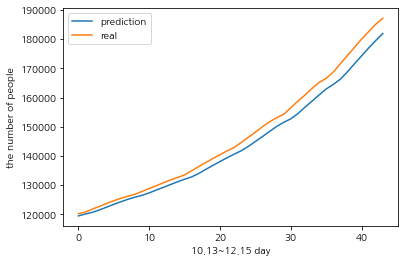

In [42]:
plt.plot(d, label="prediction")
plt.plot(y, label="real")
plt.xlabel("10.13~12.15 day")
plt.ylabel('the number of people')
plt.legend()
plt.show()

- 주황색: 실제 값  
- 파란색: 예측 값  
어느정도 유사하게 예측했음을 알 수 있다.

---

---

### 2. [RNN] 기타 데이터를 함께 이용해서 예측하기

In [43]:
merge_df0 = merge_df.drop(columns="date_time")
merge_df1 = merge_df0.drop(columns=["당일 1차접종자 수","당일 2차접종자 수","1차접종률(%)","2차접종률(%)","당일 추가접종자 수", "추가접종 누계", "추가접종률(%)"])
merge_df1

,서울시 확진자,서울시 추가 확진,서울시 사망,전국 확진,전국 추가 확진,전국 사망,1차접종 누계,2차접종 누계,social_distance,month
0,35994,218,443,115926,731,1806,291857,13543,2,4
1,36224,230,443,116661,735,1808,317386,15901,2,4
2,36428,204,444,117458,797,1811,345764,18376,2,4
3,36681,253,444,118243,785,1812,350427,18513,2,4
4,36856,175,444,118887,644,1813,350631,18513,2,4
...,...,...,...,...,...,...,...,...,...,...
235,180031,2835,1328,510583,6977,4210,7994240,7782165,1,12
236,182558,2528,1340,512976,6689,4253,7994449,7782371,1,12
237,185108,2550,1356,523088,5817,4293,8008859,7795782,1,12
238,187169,2062,1395,528652,5567,4387,8008859,7795782,1,12


In [44]:
data_li = []
for i in range(len(merge_df1)):
    data_li.append(merge_df1[i:i+3].values.tolist()[0])
print(data_li)
train_data, test_data = train_test_split(data_li, test_size=0.2, shuffle=False, random_state=13)

[[35994, 218, 443, 115926, 731, 1806, 291857, 13543, 2, 4], [36224, 230, 443, 116661, 735, 1808, 317386, 15901, 2, 4], [36428, 204, 444, 117458, 797, 1811, 345764, 18376, 2, 4], [36681, 253, 444, 118243, 785, 1812, 350427, 18513, 2, 4], [36856, 175, 444, 118887, 644, 1813, 350631, 18513, 2, 4], [37010, 154, 445, 119387, 500, 1817, 379120, 21910, 2, 4], [37126, 116, 445, 119898, 512, 1820, 403093, 25631, 2, 4], [37385, 259, 445, 120673, 775, 1821, 438269, 27699, 2, 4], [37610, 227, 447, 121351, 680, 1825, 472376, 31620, 2, 4], [37837, 227, 448, 122007, 661, 1828, 511162, 35900, 2, 4], [38032, 195, 450, 122634, 627, 1831, 519845, 36591, 2, 5], [38214, 182, 451, 123240, 606, 1833, 520200, 36591, 2, 5], [38341, 127, 451, 123728, 488, 1834, 540404, 41624, 2, 5], [38525, 184, 452, 124269, 541, 1840, 559605, 46290, 2, 5], [38763, 238, 452, 124945, 676, 1847, 563044, 47940, 2, 5], [38975, 212, 453, 125519, 574, 1851, 574583, 59707, 2, 5], [39154, 179, 457, 126044, 525, 1860, 592073, 70926, 2, 

In [45]:
def create_dataset(dataset, look_back):
    x_data = []
    y_data = []
    for i in range(len(dataset)-look_back):
        tmp = []
        for j in range(i,i+look_back):
            tmp.append(dataset[j])
            
        x_data.append(tmp)
        y_data.append(dataset[j + 1][0])

    #print("x \n", x_data)
    #print()
    #print("y \n", y_data)
        
    return np.array(x_data), np.array(y_data)


In [46]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, x_test.shape)

(189, 3, 10) (189,)
(45, 3, 10) (45, 3, 10)


In [47]:
X_train = np.reshape(x_train, (x_train.shape[0],1,30))
X_test = np.reshape(x_test, (x_test.shape[0], 1, 30))

In [48]:
import tensorflow as tf
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.batch(batch_size=3)
train_ds

<BatchDataset shapes: ((None, 1, 30), (None,)), types: (tf.int32, tf.int32)>

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(17, input_shape=(1,30)),
    tf.keras.layers.Dense(80, activation='linear'),
    tf.keras.layers.Dense(80, activation='linear'),
    tf.keras.layers.Dense(80, activation='linear'),
    tf.keras.layers.Dense(80, activation='linear'),
    tf.keras.layers.Dense(80, activation='linear'),
    #tf.keras.layers.Dense(20, activation='linear'),
    #tf.keras.layers.Dense(10, activation='linear'),
    tf.keras.layers.Dense(1)
    ])

In [85]:
model.compile(loss='mean_squared_error', optimizer="adam")
history = model.fit(train_ds, epochs=100, verbose=0)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1, 17)             527       
_________________________________________________________________
dense_38 (Dense)             (None, 1, 80)             1440      
_________________________________________________________________
dense_39 (Dense)             (None, 1, 80)             6480      
_________________________________________________________________
dense_40 (Dense)             (None, 1, 80)             6480      
_________________________________________________________________
dense_41 (Dense)             (None, 1, 80)             6480      
_________________________________________________________________
dense_42 (Dense)             (None, 1, 80)             6480      
_________________________________________________________________
dense_43 (Dense)             (None, 1, 1)             

In [86]:
loss = model.evaluate(X_test, y_test, verbose=0)

predictions = model.predict(X_test)
predictions
# 결과를 출력합니다.
print("테스트 데이터의 Loss 값: ", loss)
for i in range(5):
    print("%d 번째 테스트 데이터의 실제값: %f" % (i, y_test[i]))
    print("%d 번째 테스트 데이터의 예측값: %f" % (i, predictions[i][0]))


테스트 데이터의 Loss 값:  100178328.0
0 번째 테스트 데이터의 실제값: 120240.000000
0 번째 테스트 데이터의 예측값: 119585.906250
1 번째 테스트 데이터의 실제값: 120840.000000
1 번째 테스트 데이터의 예측값: 119612.484375
2 번째 테스트 데이터의 실제값: 121843.000000
2 번째 테스트 데이터의 예측값: 120398.890625
3 번째 테스트 데이터의 실제값: 122789.000000
3 번째 테스트 데이터의 예측값: 121047.195312
4 번째 테스트 데이터의 실제값: 123769.000000
4 번째 테스트 데이터의 예측값: 121803.328125


In [88]:
pre_li = []
p1 = predictions.tolist()
for i in range(len(p1)):
    pre_li.append(p1[i][0][0])

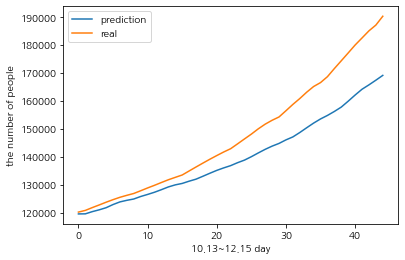

In [89]:
plt.plot(pre_li, label="prediction")
plt.plot(y_test, label="real")
plt.xlabel("10.13~12.15 day")
plt.ylabel('the number of people')
plt.legend()
plt.show()

- 주황색: 실제 값  
- 파란색: 예측 값  
어느정도 유사한 그래프의 개형을 가지나 확진자 데이터만을 가지고 RNN을 이용했을 때보다 예측률이 좋지 않음을 알 수 있다.